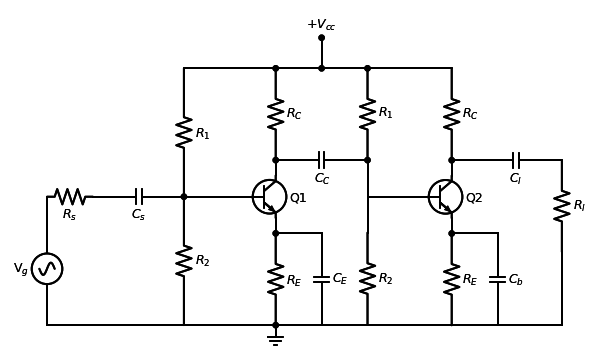

In [170]:
# Two stage Voltage divider configuration 
# Written by Sakibul Islam Rayhan
# Reg no: 2019338056

# Importing schemdraw and also elements from schemdraw
import schemdraw
import schemdraw.elements as elm

#starting designing circuit from here

with schemdraw.Drawing() as d:
    d.config(inches_per_unit=.5, unit=3)
    d += (Q1 := elm.BjtNpn(circle=True).anchor('collector').label('Q1')) # BJT 
    d += (Lc := elm.Line().up(d.unit/6).at(Q1.collector).dot()) 
    d += (Rc := elm.Resistor().at(Lc.end).up().label('$R_C$', loc = 'bot'))
    d += (Lv1 := elm.Line().left(d.unit/2))
    d += (Lv2 := elm.Line().left(d.unit/2))
    d += (R1 := elm.Resistor().down(d.unit/0.715).label('$R_1$', loc='bot').dot())
    d += (Lb := elm.Line().left(d.unit/1.35).at(Q1.base))
    d += (R2 := elm.Resistor().down(d.unit/0.715).at(R1.end).label('$R_2$', loc='bot'))
    d += (Le := elm.Line().down(d.unit/6).at(Q1.emitter).dot())
    d += (Re := elm.Resistor().at(Le.end).down().dot().label('$R_E$',loc='bot'))
    d += (Lbot := elm.Line().left().to(R2.end))
    
    # putting DC voltage source to the design 
    d += elm.Line().at(Rc.end).right(d.unit/2).dot()
    d += elm.Line().up(d.unit/3).dot().label('$+V_{cc}$',loc='right')
    
    d += (LnCs := elm.Line().right(d.unit/2).at(Re.start))
    d += elm.Line().right(d.unit/2).at(Re.end)
    d += elm.Capacitor().up().to(LnCs.end).label('$C_E$',loc='bot')
    
    # Putting Ac voltage source to the design
    d += elm.Capacitor().left().at(Lb.end).label('$C_s$', loc='bot')
    d += elm.Resistor().left(d.unit/2).label('$R_s$',loc='bot')
    d += elm.Line().down(d.unit/3.51)
    d += elm.SourceSin().down().label('V$_g$', loc='top')
    d += elm.Line().down(d.unit/8.7)
    d += elm.Line().right(d.unit*1.5)
    
    d += (TSc := elm.Capacitor().right().at(Lc.end).label('$C_C$', loc='bot').dot())
    d += elm.Ground(lead=True).at(Re.end)

    d += (TSr := elm.Resistor().at(TSc.end).up().label('$R_1$', loc='bot').dot())
    d += elm.Line().left().dot()
    d += (TSl := elm.Line().at(TSr.start).down(d.unit/2.5))
    d += elm.Line().right(d.unit/1.5)
    d += (TSB := elm.BjtNpn(circle=True).anchor('base').label('Q2'))
    d += (TSC := elm.Line().up(d.unit/6).at(TSB.collector).dot())
    d += (TSR := elm.Resistor().at(TSC.end).up().label('$R_C$', loc = 'bot'))
    d += (TSL := elm.Line().left())
    d += (TSE := elm.Line().down(d.unit/6).at(TSB.emitter).dot())
    d += (TSR := elm.Resistor().at(TSE.end).down().label('$R_E$', loc = 'bot'))
    d += elm.Line().left(d.unit*2)
    d += (TSL := elm.Line().at(TSr.start).down(d.unit*0.79))
    d += elm.Resistor().down().label('$R_2$',loc='bot')
    
    d += elm.Line().at(TSC.end).right(d.unit*0.2)
    d += (TLC := elm.Capacitor().label('$C_l$',loc='bot'))
    d += elm.Resistor().at(TLC.end).down().label('$R_l$',loc='bot')
    d += elm.Line().down(d.unit/1.255)
    d += elm.Line().left(d.unit*1.5)
    
    d += elm.Line().at(TSE.start).down(d.unit/6)
    d += elm.Line().right(d.unit/2)
    d += elm.Capacitor().down().label('$C_b$',loc='bot')
    
    #Saving The Drawing 
    d.save('TwoStageVoltageDividerBias.svg')
    d.save('TwoStageVoltageDividerBias.pdf')